In [1]:
from torchgeo.models import ResNet18_Weights, ResNet50_Weights, ViTSmall16_Weights
import timm

/home/zxc738/.conda/envs/DL/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
INFO:numexpr.utils:Note: NumExpr detected 24 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 16.
INFO:numexpr.utils:NumExpr defaulting to 16 threads.


In [3]:
weights = ViTSmall16_Weights.SENTINEL2_ALL_MOCO
in_chans = weights.meta["in_chans"]
visual = timm.create_model("vit_small_patch16_224", in_chans=13, num_classes=512)
visual.load_state_dict(weights.get_state_dict(progress=True), strict=False)

Downloading: "https://hf.co/torchgeo/vit_small_patch16_224_sentinel2_all_moco/resolve/1cb683f6c14739634cdfaaceb076529adf898c74/vit_small_patch16_224_sentinel2_all_moco-67c9032d.pth" to /home/zxc738/.cache/torch/hub/checkpoints/vit_small_patch16_224_sentinel2_all_moco-67c9032d.pth
100%|██████████| 86.5M/86.5M [00:01<00:00, 90.4MB/s]


_IncompatibleKeys(missing_keys=['head.weight', 'head.bias'], unexpected_keys=[])

In [22]:
visual.head

Linear(in_features=384, out_features=512, bias=True)

In [16]:
weights = ResNet18_Weights.SENTINEL2_ALL_MOCO
in_chans = weights.meta["in_chans"]
visual = timm.create_model("resnet18", in_chans=13, num_classes=512)
visual.load_state_dict(weights.get_state_dict(progress=True), strict=False)

Downloading: "https://hf.co/torchgeo/resnet18_sentinel2_all_moco/resolve/5b8cddc9a14f3844350b7f40b85bcd32aed75918/resnet18_sentinel2_all_moco-59bfdff9.pth" to /home/zxc738/.cache/torch/hub/checkpoints/resnet18_sentinel2_all_moco-59bfdff9.pth
100%|██████████| 42.8M/42.8M [00:00<00:00, 191MB/s] 


_IncompatibleKeys(missing_keys=['fc.weight', 'fc.bias'], unexpected_keys=[])

In [4]:
visual

VisionTransformer(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(13, 384, kernel_size=(16, 16), stride=(16, 16))
    (norm): Identity()
  )
  (pos_drop): Dropout(p=0.0, inplace=False)
  (patch_drop): Identity()
  (norm_pre): Identity()
  (blocks): Sequential(
    (0): Block(
      (norm1): LayerNorm((384,), eps=1e-06, elementwise_affine=True)
      (attn): Attention(
        (qkv): Linear(in_features=384, out_features=1152, bias=True)
        (q_norm): Identity()
        (k_norm): Identity()
        (attn_drop): Dropout(p=0.0, inplace=False)
        (proj): Linear(in_features=384, out_features=384, bias=True)
        (proj_drop): Dropout(p=0.0, inplace=False)
      )
      (ls1): Identity()
      (drop_path1): Identity()
      (norm2): LayerNorm((384,), eps=1e-06, elementwise_affine=True)
      (mlp): Mlp(
        (fc1): Linear(in_features=384, out_features=1536, bias=True)
        (act): GELU(approximate='none')
        (drop1): Dropout(p=0.0, inplace=False)
        (norm): Identity

In [3]:
weights = ViTSmall16_Weights.SENTINEL2_ALL_MOCO

In [4]:
weights.meta

{'dataset': 'SSL4EO-S12',
 'in_chans': 13,
 'model': 'vit_small_patch16_224',
 'publication': 'https://arxiv.org/abs/2211.07044',
 'repo': 'https://github.com/zhu-xlab/SSL4EO-S12',
 'ssl_method': 'moco',
 'bands': ['B1',
  'B2',
  'B3',
  'B4',
  'B5',
  'B6',
  'B7',
  'B8',
  'B8a',
  'B9',
  'B10',
  'B11',
  'B12']}

In [5]:
from torchgeo.models import DOFABase16_Weights

In [6]:
DOFABase16_Weights.DOFA_MAE.meta

{'dataset': 'SatlasPretrain, Five-Billion-Pixels, HySpecNet-11k',
 'model': 'dofa_base_patch16_224',
 'publication': 'https://arxiv.org/abs/2403.15356',
 'repo': 'https://github.com/zhu-xlab/DOFA',
 'ssl_method': 'mae'}

In [28]:
from torchgeo.models import DOFABase16_Weights, dofa_base_patch16_224

In [51]:
# Use pre-trained model weights
model = dofa_base_patch16_224(weights=DOFABase16_Weights.DOFA_MAE)
del model.head_drop
del model.head

In [52]:
model

DOFA(
  (fc_norm): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
  (patch_embed): DOFAEmbedding(
    (weight_generator): TransformerWeightGenerator(
      (transformer_encoder): TransformerEncoder(
        (layers): ModuleList(
          (0): TransformerEncoderLayer(
            (self_attn): MultiheadAttention(
              (out_proj): NonDynamicallyQuantizableLinear(in_features=128, out_features=128, bias=True)
            )
            (linear1): Linear(in_features=128, out_features=2048, bias=True)
            (dropout): Dropout(p=False, inplace=False)
            (linear2): Linear(in_features=2048, out_features=128, bias=True)
            (norm1): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
            (norm2): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
            (dropout1): Dropout(p=False, inplace=False)
            (dropout2): Dropout(p=False, inplace=False)
          )
        )
      )
      (fc_weight): Linear(in_features=128, out_features=1966

In [53]:
last_layer = model.blocks[-1].norm1 #find the last layer before the head was removed.
in_features = last_layer.normalized_shape[0]
in_features

768

In [54]:
import torch
import torch.nn as nn

# Create the individual layers
norm = nn.LayerNorm(in_features)
fc_norm = nn.Identity()
head_drop = nn.Dropout(p=0.0)
head = nn.Linear(in_features, 512)

# Assign the layers directly to the model
model.norm = norm
model.fc_norm2 = fc_norm
model.head_drop = head_drop
model.head = head


In [55]:
model

DOFA(
  (fc_norm): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
  (patch_embed): DOFAEmbedding(
    (weight_generator): TransformerWeightGenerator(
      (transformer_encoder): TransformerEncoder(
        (layers): ModuleList(
          (0): TransformerEncoderLayer(
            (self_attn): MultiheadAttention(
              (out_proj): NonDynamicallyQuantizableLinear(in_features=128, out_features=128, bias=True)
            )
            (linear1): Linear(in_features=128, out_features=2048, bias=True)
            (dropout): Dropout(p=False, inplace=False)
            (linear2): Linear(in_features=2048, out_features=128, bias=True)
            (norm1): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
            (norm2): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
            (dropout1): Dropout(p=False, inplace=False)
            (dropout2): Dropout(p=False, inplace=False)
          )
        )
      )
      (fc_weight): Linear(in_features=128, out_features=1966

In [11]:
# check the instance of the model
type(model)

torchgeo.models.dofa.DOFA

In [17]:
model.patch_embed.weight_generator.fc_weight.weight.dtype

torch.float32

In [18]:
for param in model.head.parameters():
    param.requires_grad = False

# Generate Index Files for GSI and GSV

In [1]:
import pandas as pd
gsi_index = "/mnt/pan/SOM_CVRI_JXD101/DATA_SCIENCE/GIS/GOOGLE_IMAGERY/GSI/USA/GSI_points_loc_bg.csv"

In [2]:
id_df = pd.read_csv(gsi_index)
id_df.head()

,Unnamed: 0,GEOID_BG_2022,latitude,longitude
0,0,40199408002,31.855022,-112.400627
1,1,40199408002,31.858772,-112.376041
2,2,40199408002,31.920733,-112.322671
3,3,40199408002,32.039518,-112.198361
4,4,40199408002,32.019536,-112.223490


In [3]:
# create a column called fn, where the value is from column "Unnamed: 0" and add '.tif' to the end
id_df['fn'] = id_df['Unnamed: 0'].astype(str) + '.tif'

In [5]:
# delete column "Unnamed: 0"
id_df = id_df.drop(columns=['Unnamed: 0'])
id_df

,GEOID_BG_2022,latitude,longitude,fn
0,40199408002,31.855022,-112.400627,0.tif
1,40199408002,31.858772,-112.376041,1.tif
2,40199408002,31.920733,-112.322671,2.tif
3,40199408002,32.039518,-112.198361,3.tif
4,40199408002,32.019536,-112.223490,4.tif
...,...,...,...,...
737323,40050017002,35.283698,-112.184595,737474.tif
737324,40050017002,35.307368,-112.181487,737475.tif
737325,40050017002,35.312402,-112.179483,737476.tif
737326,40050017002,35.293772,-112.182585,737477.tif


In [6]:
# change the fn values so it preceed the .tif with values from the GEOID_BG_2022 column
id_df['fn'] = id_df['GEOID_BG_2022'].astype(str) + '.0/' + id_df['fn']

In [8]:
# remove column GEOID_BG_2022
id_df = id_df.drop(columns=['GEOID_BG_2022'])
# save the dataframe to a new csv file
id_df.to_csv('/mnt/pan/SOM_CVRI_JXD101/DATA_SCIENCE/GIS/GOOGLE_IMAGERY/GSI/USA/index.csv', index=False)

In [9]:
id_df

,latitude,longitude,fn
0,31.855022,-112.400627,40199408002.0/0.tif
1,31.858772,-112.376041,40199408002.0/1.tif
2,31.920733,-112.322671,40199408002.0/2.tif
3,32.039518,-112.198361,40199408002.0/3.tif
4,32.019536,-112.223490,40199408002.0/4.tif
...,...,...,...
737323,35.283698,-112.184595,40050017002.0/737474.tif
737324,35.307368,-112.181487,40050017002.0/737475.tif
737325,35.312402,-112.179483,40050017002.0/737476.tif
737326,35.293772,-112.182585,40050017002.0/737477.tif


In [74]:
import pandas as pd
gsv_index_file = "/mnt/pan/SOM_CVRI_JXD101/DATA_SCIENCE/GIS/GOOGLE_IMAGERY/GSV/USA/GSV_latlon_GEOID_results.csv"
id_df = pd.read_csv(gsv_index_file)
id_df

,Unnamed: 0,GEOID,latitude,longitude
0,5,4.003001e+10,31.336314,-109.544279
1,6,4.003001e+10,31.338970,-109.546577
2,7,4.003001e+10,31.338153,-109.541541
3,8,4.003001e+10,31.336532,-109.542117
4,9,4.003001e+10,31.334555,-109.542469
...,...,...,...,...
917523,4671865,7.212395e+11,17.943921,-66.263496
917524,4671948,7.212395e+11,17.943580,-66.263473
917525,4671949,7.212395e+11,17.943594,-66.263131
917526,4671963,7.212395e+11,17.943425,-66.263182


In [75]:
# Create a list of file names for each row
id_df['fn'] = id_df['Unnamed: 0'].astype(str).apply(
    lambda x: [f'{x}/head_0.jpg', f'{x}/head_180.jpg', f'{x}/head_270.jpg', f'{x}/head_90.jpg']
)

# Explode the list into separate rows
id_df = id_df.explode('fn', ignore_index=True)

In [76]:
# remove column "Unnamed: 0"
id_df = id_df.drop(columns=['Unnamed: 0'])

id_df

,GEOID,latitude,longitude,fn
0,4.003001e+10,31.336314,-109.544279,5/head_0.jpg
1,4.003001e+10,31.336314,-109.544279,5/head_180.jpg
2,4.003001e+10,31.336314,-109.544279,5/head_270.jpg
3,4.003001e+10,31.336314,-109.544279,5/head_90.jpg
4,4.003001e+10,31.338970,-109.546577,6/head_0.jpg
...,...,...,...,...
3670107,7.212395e+11,17.943425,-66.263182,4671963/head_90.jpg
3670108,7.213712e+11,18.433523,-66.189234,4684814/head_0.jpg
3670109,7.213712e+11,18.433523,-66.189234,4684814/head_180.jpg
3670110,7.213712e+11,18.433523,-66.189234,4684814/head_270.jpg


In [77]:
import os
import pandas as pd

image_path = '/mnt/pan/SOM_CVRI_JXD101/DATA_SCIENCE/GIS/GOOGLE_IMAGERY/GSV/USA/USA_BlockGroups'

indices_to_drop = []

for index, fn in id_df['fn'].items():
    if not os.path.exists(os.path.join(image_path, fn)):
        print(f"Missing file: {fn}, index: {index}")
        break

Missing file: 3748/head_0.jpg, index: 10928


In [71]:
import os
import pandas as pd
from concurrent.futures import ThreadPoolExecutor
from tqdm import tqdm

image_path = '/mnt/pan/SOM_CVRI_JXD101/DATA_SCIENCE/GIS/GOOGLE_IMAGERY/GSV/USA/USA_BlockGroups'

def file_exists(fn):
    return os.path.exists(os.path.join(image_path, fn))

indices_to_drop = []

with ThreadPoolExecutor() as executor:
    for index, exists in tqdm(enumerate(executor.map(file_exists, id_df['fn'])), total=len(id_df['fn'])):
        if not exists:
            indices_to_drop.append(id_df.index[index]) #append the real index.

id_df = .drop(indices_to_drop)

100%|██████████| 3670112/3670112 [41:37<00:00, 1469.39it/s] 


In [73]:
indices_to_drop

[10928,
 299512,
 299515,
 310951,
 516702,
 516703,
 850586,
 911559,
 963002,
 1159701,
 1186013,
 1186118,
 1186327,
 1186392,
 1227861,
 1227863,
 1479354,
 1479355,
 1576263,
 1637531,
 1637545,
 1637547,
 1648035,
 1650118,
 1650119,
 1860153,
 1860550,
 2022809,
 2042705,
 2159064,
 2159463,
 2159502,
 2159590,
 2502688,
 2502689,
 2618540,
 2618541,
 2618542,
 2643371,
 2681173,
 2693124,
 2693125,
 2693127,
 2748121,
 2823383,
 2871581,
 2997036,
 2997056,
 2997059,
 3008340,
 3094960,
 3113662,
 3119087,
 3176353,
 3176361,
 3185524,
 3244132,
 3244186,
 3261776,
 3333460,
 3333462,
 3551104,
 3560909,
 3560916,
 3593242,
 3593716,
 3593717,
 3593718,
 3608287,
 3610752,
 3613545,
 3613552,
 3646468,
 3655366,
 3660534]

In [72]:
# save the dataframe to a new csv file
id_df.to_csv('/mnt/pan/SOM_CVRI_JXD101/DATA_SCIENCE/GIS/GOOGLE_IMAGERY/GSV/USA/index.csv', index=False)

In [78]:
# load the dataframe from the new csv file
id_df = pd.read_csv('/mnt/pan/SOM_CVRI_JXD101/DATA_SCIENCE/GIS/GOOGLE_IMAGERY/GSV/USA/index.csv')
id_df

,GEOID,latitude,longitude,fn
0,4.003001e+10,31.336314,-109.544279,5/head_0.jpg
1,4.003001e+10,31.336314,-109.544279,5/head_180.jpg
2,4.003001e+10,31.336314,-109.544279,5/head_270.jpg
3,4.003001e+10,31.336314,-109.544279,5/head_90.jpg
4,4.003001e+10,31.338970,-109.546577,6/head_0.jpg
...,...,...,...,...
3670032,7.212395e+11,17.943425,-66.263182,4671963/head_90.jpg
3670033,7.213712e+11,18.433523,-66.189234,4684814/head_0.jpg
3670034,7.213712e+11,18.433523,-66.189234,4684814/head_180.jpg
3670035,7.213712e+11,18.433523,-66.189234,4684814/head_270.jpg


In [10]:
import cv2
import numpy as np
import glob

# Initialize accumulators
sum_r = sum_g = sum_b = 0
sum_sq_r = sum_sq_g = sum_sq_b = 0
num_pixels = 0

# Path to the directory containing images
image_files = glob.glob('/mnt/pan/SOM_CVRI_JXD101/DATA_SCIENCE/GIS/GOOGLE_IMAGERY/GSI/USA/imagery/40199408002.0/*.tif')

for file in image_files:
    image = cv2.imread(file)
    # Convert image to float32 for precision
    image = image.astype(np.float32) / 255.0
    # Split into channels
    b, g, r = cv2.split(image)
    # Update sums
    sum_r += np.sum(r)
    sum_g += np.sum(g)
    sum_b += np.sum(b)
    # Update squared sums
    sum_sq_r += np.sum(r ** 2)
    sum_sq_g += np.sum(g ** 2)
    sum_sq_b += np.sum(b ** 2)
    # Update pixel count
    num_pixels += r.size

# Calculate means
mean_r = sum_r / num_pixels
mean_g = sum_g / num_pixels
mean_b = sum_b / num_pixels

# Calculate standard deviations
std_r = np.sqrt(sum_sq_r / num_pixels - mean_r ** 2)
std_g = np.sqrt(sum_sq_g / num_pixels - mean_g ** 2)
std_b = np.sqrt(sum_sq_b / num_pixels - mean_b ** 2)

print(f'Mean R: {mean_r}, G: {mean_g}, B: {mean_b}')
print(f'Std Dev R: {std_r}, G: {std_g}, B: {std_b}')


Mean R: 0.4907000031937556, G: 0.46197077877933224, B: 0.44682317977496244
Std Dev R: 0.22560836016717511, G: 0.18158306480782252, B: 0.14170229545971405


In [20]:
# calculate the size of the image and width and height
image = cv2.imread('/mnt/pan/SOM_CVRI_JXD101/DATA_SCIENCE/GIS/GOOGLE_IMAGERY/GSI/USA/imagery/40050017002.0/737475.tif')
height, width, channels = image.shape
print(f"Height: {height}, Width: {width}, Channels: {channels}")

# print size of the file in kb
import os
file_size = os.path.getsize('/mnt/pan/SOM_CVRI_JXD101/DATA_SCIENCE/GIS/GOOGLE_IMAGERY/GSI/USA/imagery/40050017002.0/737475.tif')
print(f"File size: {file_size / 1024:.2f} KB")

Height: 513, Width: 513, Channels: 3
File size: 448.10 KB


In [24]:
path = "data/s2/images/patch_0.tif"
# print size of the file in kb
import os
file_size = os.path.getsize(path)
print(f"File size: {file_size / 1024:.2f} KB")

File size: 807.03 KB


In [25]:
import rasterio
import numpy as np

def read_sentinel2_image(filepath):
    """
    Reads a Sentinel-2 image from a GeoTIFF file.

    Args:
        filepath (str): Path to the Sentinel-2 GeoTIFF file.

    Returns:
        numpy.ndarray: Image data as a NumPy array (height, width, bands).
        dict: Metadata from the GeoTIFF file.
    """
    try:
        with rasterio.open(filepath) as src:
            # Read all bands into a NumPy array
            image_data = src.read()
            # Transpose to (height, width, bands)
            image_data = np.transpose(image_data, (1, 2, 0))
            metadata = src.meta
            return image_data, metadata
    except rasterio.RasterioIOError:
        print(f"Error: Could not open file {filepath}. Check if the file exists and is a valid GeoTIFF.")
        return None, None
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return None, None

# Example usage:
filepath = "data/s2/images/patch_0.tif"
image, metadata = read_sentinel2_image(filepath)

if image is not None:
    height, width, bands = image.shape
    print(f"Height: {height}, Width: {width}, Bands: {bands}")
    print(f"Metadata: {metadata}")

    # Access individual bands:
    band_1 = image[:, :, 0] # first band.
    # ... and so on

Height: 256, Width: 256, Bands: 12
Metadata: {'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 256, 'height': 256, 'count': 12, 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 10N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-123],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32610"]]'), 'transform': Affine(10.0, 0.0, 360405.0,
       0.0, -10.0, 4578135.0)}


In [30]:
data_source_path = '/mnt/pan/SOM_CVRI_JXD101/DATA_SCIENCE/GIS/GOOGLE_IMAGERY/GSI/USA/imagery'
data_dest_path = '/mnt/pan/SOM_CVRI_JXD101/DATA_SCIENCE/GIS/Multi_Geo_CLIP/satclip/satclip/data/gsi/images'

In [57]:
gsi_index = pd.read_csv('/mnt/pan/SOM_CVRI_JXD101/DATA_SCIENCE/GIS/GOOGLE_IMAGERY/GSI/USA/index.csv')

In [58]:
gsi_index

,latitude,longitude,fn
0,31.855022,-112.400627,40199408002.0/0.tif
1,31.858772,-112.376041,40199408002.0/1.tif
2,31.920733,-112.322671,40199408002.0/2.tif
3,32.039518,-112.198361,40199408002.0/3.tif
4,32.019536,-112.223490,40199408002.0/4.tif
...,...,...,...
737323,35.283698,-112.184595,40050017002.0/737474.tif
737324,35.307368,-112.181487,40050017002.0/737475.tif
737325,35.312402,-112.179483,40050017002.0/737476.tif
737326,35.293772,-112.182585,40050017002.0/737477.tif


In [59]:
# get first 1000 fns from gsi_index
fns = gsi_index['fn'].head(1000)
fns

0         40199408002.0/0.tif
1         40199408002.0/1.tif
2         40199408002.0/2.tif
3         40199408002.0/3.tif
4         40199408002.0/4.tif
                ...          
995    80130121073.0/1001.tif
996    80130121073.0/1002.tif
997    81010029192.0/1003.tif
998    81010029192.0/1004.tif
999    81010029192.0/1005.tif
Name: fn, Length: 1000, dtype: object

In [61]:
gsi_1000 = gsi_index.head(1000)
# save
gsi_1000.to_csv('/mnt/pan/SOM_CVRI_JXD101/DATA_SCIENCE/GIS/Multi_Geo_CLIP/satclip/satclip/data/gsi/index.csv', index=False)

In [62]:
# another copy
gsi_1000.to_csv('/mnt/pan/SOM_CVRI_JXD101/DATA_SCIENCE/GIS/GOOGLE_IMAGERY/GSI/USA/index_test.csv', index=False)

In [36]:
import os
import shutil
import pandas as pd

def move_files_with_folders(file_paths, source_root, dest_root):
    """
    Moves files to destination folders based on the folder structure in their file paths.

    Args:
        file_paths (pd.Series): Pandas Series of file paths (e.g., from a CSV).
        source_root (str): Root directory where the original files are located.
        dest_root (str): Root directory where the files will be moved.
    """

    try:
        for file_path in file_paths:
            # 1. Extract folder and filename
            folder, filename = os.path.split(file_path)

            # 2. Construct source and destination paths
            source_file = os.path.join(source_root, file_path)
            dest_folder = os.path.join(dest_root, folder)
            dest_file = os.path.join(dest_folder, filename)

            # 3. Create destination folder if it doesn't exist
            os.makedirs(dest_folder, exist_ok=True)

            # 4. Move the file
            shutil.move(source_file, dest_file)
            print(f"Moved: {file_path} to {dest_file}")

        print("File moving complete.")

    except FileNotFoundError as e:
        print(f"File not found: {e}")
    except OSError as e:
        print(f"Error moving file: {e}")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")


source_root = "/mnt/pan/SOM_CVRI_JXD101/DATA_SCIENCE/GIS/GOOGLE_IMAGERY/GSI/USA/imagery"  # Replace with your source root
dest_root = "/mnt/pan/SOM_CVRI_JXD101/DATA_SCIENCE/GIS/Multi_Geo_CLIP/satclip/satclip/data/gsi/images" # Replace with your destination root

move_files_with_folders(fns, source_root, dest_root)

Image resizing complete.


In [63]:
import os
import shutil
import pandas as pd

def copy_files_back(file_paths, source_root, dest_root):
    """
    Copies files back to their original location based on the folder structure in their file paths.

    Args:
        file_paths (pd.Series): Pandas Series of file paths (e.g., from a CSV).
        source_root (str): Root directory where the files were originally located.
        dest_root (str): Root directory where the files are currently located.
    """

    try:
        for file_path in file_paths:
            # 1. Extract folder and filename
            folder, filename = os.path.split(file_path)

            # 2. Construct source and destination paths
            source_file = os.path.join(source_root, file_path)
            dest_file = os.path.join(dest_root, folder, filename) #correct the dest path to match the moved files.

            # 3. Create destination folder if it doesn't exist (in the original location)
            os.makedirs(os.path.join(source_root, folder), exist_ok=True) #create original folders

            # 4. Copy the file
            shutil.copy2(dest_file, source_file)
            # print(f"Copied: {dest_file} to {source_file}")

        print("File copying complete.")

    except FileNotFoundError as e:
        print(f"File not found: {e}")
    except OSError as e:
        print(f"Error copying file: {e}")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

# Example usage:
source_root = "/mnt/pan/SOM_CVRI_JXD101/DATA_SCIENCE/GIS/GOOGLE_IMAGERY/GSI/USA/imagery"  # Replace with your source root
dest_root = "/mnt/pan/SOM_CVRI_JXD101/DATA_SCIENCE/GIS/Multi_Geo_CLIP/satclip/satclip/data/gsi/images" # Replace with your destination root

# Assuming 'fns' is your list of file paths (as you used in the move operation)
# fns = ["40199408002.0/0.tif", "40199408002.0/1.tif", ...] # your list of file paths.

copy_files_back(pd.Series(fns), source_root, dest_root)

File copying complete.


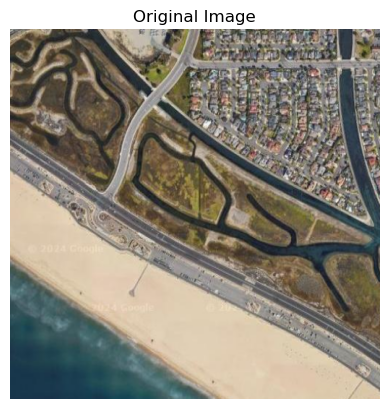

In [37]:
import cv2
import matplotlib.pyplot as plt
import os

image_path = "/mnt/pan/SOM_CVRI_JXD101/DATA_SCIENCE/GIS/Multi_Geo_CLIP/satclip/satclip/data/gsi/images/60590992393.0/24.tif"  # Replace with the actual path to your image

if os.path.exists(image_path):
    img = cv2.imread(image_path)

    if img is not None:
        # OpenCV reads images in BGR format, matplotlib expects RGB
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.imshow(img_rgb)
        plt.title("Original Image")
        plt.axis('off')  # Turn off axis labels
        plt.show()
    else:
        print(f"Error: Could not read image at {image_path}")

else:
    print(f"Error: Image file not found at {image_path}")

In [ ]:
import cv2
import os
import matplotlib.pyplot as plt

def resize_images_from_list(fns, base_path="data/gsi/images", target_size=(512, 512)):
    """
    Resizes images from a list of filenames, assuming they are located in a base directory.

    Args:
        fns (list): List of filenames (e.g., ["40199408002.0/0.tif", "80130121073.0/1001.tif"]).
        base_path (str): Base directory where the images are located.
        target_size (tuple): Target size (width, height) for the resized images.
    """

    for fn in fns:
        try:
            full_path = os.path.join(base_path, fn)

            if not os.path.exists(full_path):
                print(f"Warning: File not found: {full_path}. Skipping.")
                continue

            img = cv2.imread(full_path)

            if img is None:
                print(f"Warning: Could not read image {full_path}. Skipping.")
                continue

            resized_img = cv2.resize(img, target_size)
            cv2.imwrite(full_path, resized_img) #overwrite image with resized

        except cv2.error as e:
            print(f"Error processing image {full_path}: {e}")
        except Exception as e:
            print(f"An unexpected error occurred: {e}")

    print("Image resizing complete.")

resize_images_from_list(fns)